In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [2]:
#read in data file and skip to data
file=open("/Users/Roslyn/Desktop/run-XXXII", "r")
#print(file.readline()) 

In [3]:
with file as f:
    lines_after_6 = f.readlines()[7:]

#print(lines_after_6[0])

In [4]:
#extract first two coloumns and convert to float
col1=[]
for x in lines_after_6:
    col1.append(float(x.split()[0]))
    
    
col2=[]
for x in lines_after_6:
    col2.append(float(x.split()[1]))

In [5]:
#combine real and imaginary parts to give list of complex data outputs
data=np.vectorize(complex)(col1, col2)
#print(data[0])
#print(len(data))

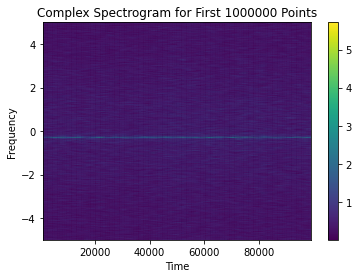

In [6]:
#complex spectrogram of first 1000000 points
f, t, Sxx = signal.spectrogram(data[:1000000]-np.mean(data[:1000000]), 10, nperseg=20000, return_onesided=False, mode='complex')
plt.pcolormesh(t, fftshift(f), fftshift(abs(Sxx), axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Complex Spectrogram for First 1000000 Points')
plt.show()

#there is some loss in resolution here in order to get larger time axis 

In [7]:
np.shape(Sxx)
#print(len(Sxx))
#print(len(f))
#print(len(t))

(20000, 57)

In [8]:
#Dividing each row of spectrogram Sxx by the average for each frequency and taking abs value
absnormSxx=[]

for i in range(0,len(Sxx)):
    absnormSxx.append(abs((Sxx[i]/np.median(abs(Sxx[i])))))
    

#checking this    
print(len(absnormSxx))
#print(absnormSxx[0])
#print(abs(Sxx[0]/np.mean(abs(Sxx[0]))))
print(len(absnormSxx[0]))

20000
57


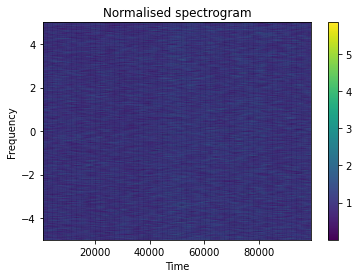

In [9]:
plt.pcolormesh(t, fftshift(f), fftshift(absnormSxx, axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Normalised spectrogram')
plt.show()

#this is flat as expected for normalised

In [13]:
#using test code, implement differencing and take abs value for plotting
#introduce an offset of 5 into i=2 of the array to check it shows 

timecols=np.transpose(absnormSxx)
timecols[2]=timecols[2]+5

#Z=np.zeros((len(t),len(absnormSxx)))
#Z[2]=Z[2]+5
#timecols= np.add(timecols,Z)

print(len(timecols))
print(len(timecols[0]))

absdiff=[]
slice1=[]

for j in range(0,len(absnormSxx)):
    slice1.clear()
    for i in range(0,(len(t)-1)):
        slice1.append(abs(timecols[i+1][j]-timecols[i][j]))
    absdiff.append(slice1[:])
    
print(len(absdiff))
print(len(absdiff[0]))

57
20000
20000
56


In [14]:
#create time axis of matching dimension
difft=np.delete(t,0)
#print(len(difft))

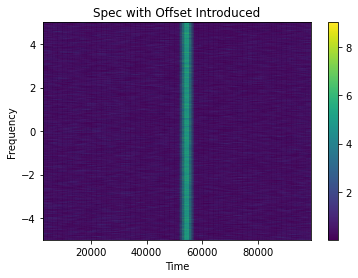

In [15]:
plt.pcolormesh(difft, fftshift(f), np.array(fftshift(absdiff)), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spec with Offset Introduced')
plt.show()